# Data Set Information:

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].
-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].
-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

[1] GÃ³mez Hidalgo, J.M., Cajigas Bringas, G., Puertas Sanz, E., Carrero GarcÃ­a, F. Content Based SMS Spam Filtering. Proceedings of the 2006 ACM Symposium on Document Engineering (ACM DOCENG'06), Amsterdam, The Netherlands, 10-13, 2006.

[2] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Feature engineering for mobile (SMS) spam filtering. Proceedings of the 30th Annual international ACM Conference on Research and Development in information Retrieval (ACM SIGIR'07), New York, NY, 871-872, 2007.

[3] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Spam filtering for short messages. Proceedings of the 16th ACM Conference on Information and Knowledge Management (ACM CIKM'07). Lisbon, Portugal, 313-320, 2007.


## Attribute Information:

The collection is composed by just one text file, where each line has the correct class followed by the raw message. We offer some examples bellow:

ham What you doing?how are you?
ham Ok lar... Joking wif u oni...
ham dun say so early hor... U c already then say...
ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*
ham Siva is in hostel aha:-.
ham Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor.
spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B
spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU


# Necessary process to follow
> Read dataset and make it in proper format.

> Encode labels

> Convert all cases to lower

> Remove punctuations

> Remove Stopwords

> Check stats of messages

> convert all text into vectors

> Import classifier

> Train and Test

> Check the accuracy/confusion matrix

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the datset

In [6]:
sms=pd.read_csv('spam_messages.csv',encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
# Datset has extra column so we are removuing it
sms.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [8]:
# changing the name of the columns
sms.rename(columns={'v1':'label','v2':'messages'},inplace=True)

In [9]:
sms.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Now the dataset is looking good.

# Exploratory Data Analysis

In [10]:
# checking shape
print('shape=',sms.shape)

shape= (5572, 2)


So we have 5572 rows and 2 columns in the datset.

In [12]:
# Checking counts of the ham and spam in label columns
print('ham and spam counts',"\n",sms.label.value_counts())

ham and spam counts 
 ham     4825
spam     747
Name: label, dtype: int64


In [13]:
# checking ratio of ham and spam
print ('ham ratio =', round(len(sms[sms['label']=='ham'])/len(sms.label),2)*100,'%')
print ('spam ratio =',round(len(sms[sms['label']=='spam'])/len(sms.label),2)*100,'%')

ham ratio = 87.0 %
spam ratio = 13.0 %


In [17]:
# New column for Length of message
sms['length']=sms.messages.str.len()
sms.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Now we can see one column 'length' has been added in the datset and giving length of the messages.

In [18]:
# lable coding 0 and 1
sms['label'].replace({'ham':0,'spam':1},inplace=True)

In [19]:
# converting all messages to lower case
sms['messages']=sms['messages'].str.lower()

In [20]:
sms.head()

,label,messages,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


Now we can see label column has been converted into 0 and 1 and messages column is converted into lower case.

In [21]:
# Replace email addresses with 'email'
sms['messages']=sms['messages'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                           'emailaddress')

In [23]:
# Replace URLs with 'webaddress'
sms['messages']=sms['messages'].str.replace(r'^http\://a[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                            'webaddress')

In [24]:
# Replace money symbols with 'moneysymb'(£ can be typed with ALT + 156)
sms['messages']=sms['messages'].str.replace(r'£|\$','dollers')

In [26]:
# Replace 10 didgit phone numbers(formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
sms['messages']=sms['messages'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                         'phonenumber')

In [27]:
# replace numbers with 'numbr'
sms['messages']=sms['messages'].str.replace(r'\d+(\.\d+)?','numbr')

In [28]:
# Remove Punctuation
sms['messages']=sms['messages'].str.replace(r'[^\w\d\s]',' ')


# Replace whitespace between terms with a single space
sms['messages']=sms['messages'].str.replace(r'\s+', ' ')


# Remove Leading and trailing whitespace
sms['messages']=sms['messages'].str.replace(r'^\s+|\s+?$','')

In [29]:
sms.head()

,label,messages,length
0,0,go until jurong point crazy available only in ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in numbr a wkly comp to win fa cup ...,155
3,0,u dun say so early hor u c already then say,49
4,0,nah i don t think he goes to usf he lives arou...,61


So data is looking fine and clean now.

# Removing Stopwords

In [30]:
import string
import nltk
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english')+['u','ur','4','2','im','dont','doin','ure'])

sms['messages']=sms['messages'].apply(lambda x: ' '.join(
term for term in x.split() if term not in stop_words))

In [32]:
# New column (clean_length) after punctuations, stopwords removal
sms['clean_length']=sms.messages.str.len()
sms.head()

,label,messages,length,clean_length
0,0,go jurong point crazy available bugis n great ...,111,82
1,0,ok lar joking wif oni,29,21
2,1,free entry numbr wkly comp win fa cup final tk...,155,139
3,0,dun say early hor c already say,49,31
4,0,nah think goes usf lives around though,61,38


Now we can see the cleaned_lenth column is giving clean length of the messages data.

In [33]:
# Total Length removal
print('original length', sms.length.sum())
print('claen length', sms.clean_length.sum())

original length 447790
claen length 300209


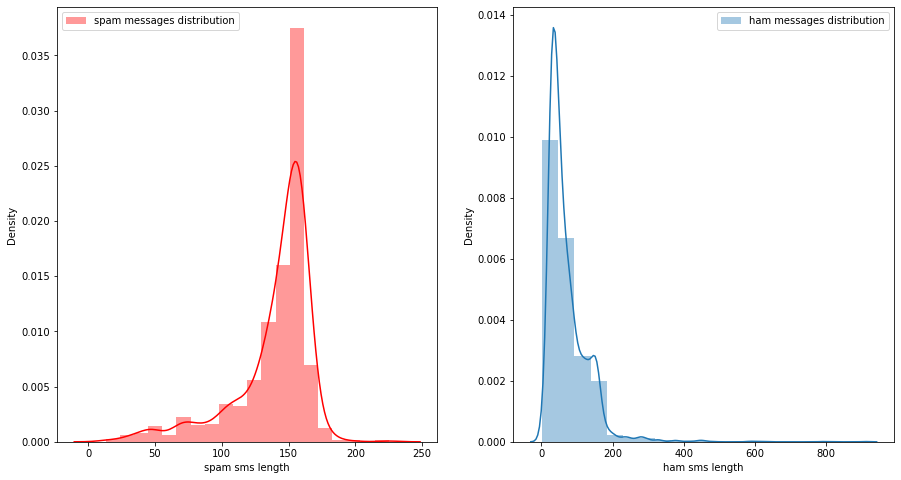

In [36]:
# Message distribution BEFORE cleaning
f,ax =plt.subplots(1,2,figsize=(15,8))

sns.distplot(sms[sms['label']==1]['length'],bins=20,ax=ax[0],label='spam messages distribution',color='r')

ax[0].set_xlabel('spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()
plt.show()

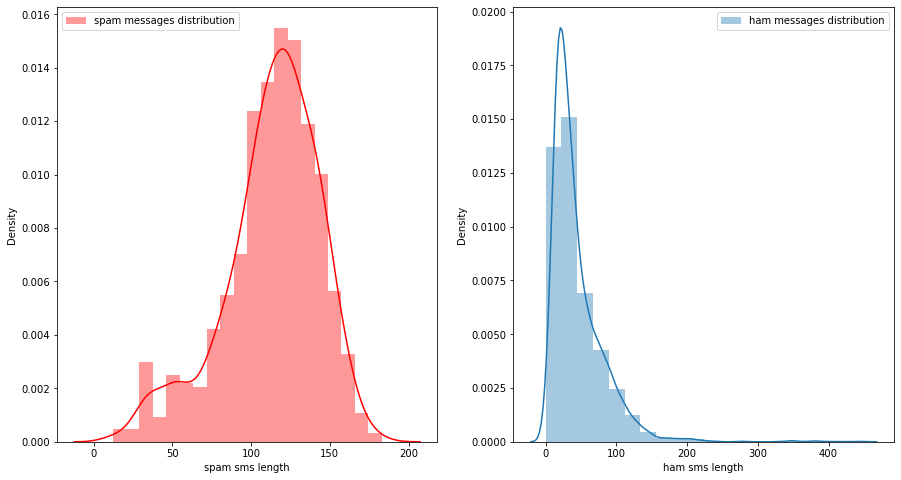

In [37]:
# Message distribution AFTER cleaning
f,ax =plt.subplots(1,2,figsize=(15,8))

sns.distplot(sms[sms['label']==1]['clean_length'],bins=20,ax=ax[0],label='spam messages distribution',color='r')

ax[0].set_xlabel('spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()
plt.show()

In [47]:
# intalling wordcloud
#!pip install wordcloud

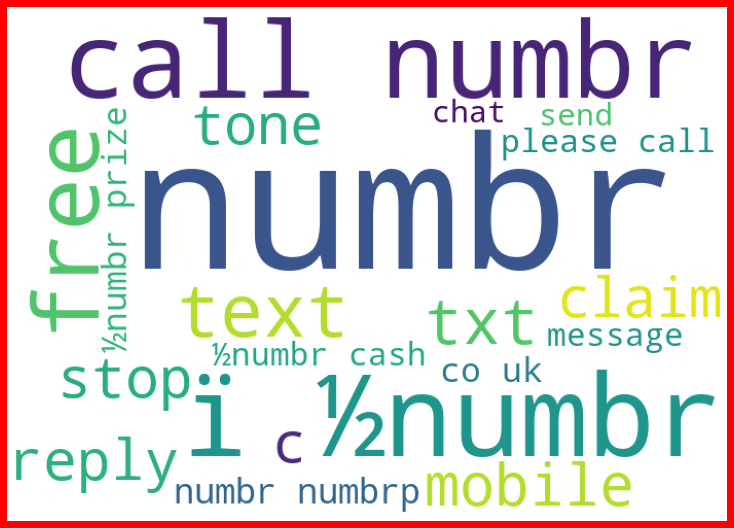

In [48]:
# Getting sense of Loud words in spam

from wordcloud import WordCloud

spams=sms['messages'][sms['label']==1]

spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see these word are indication of spams.

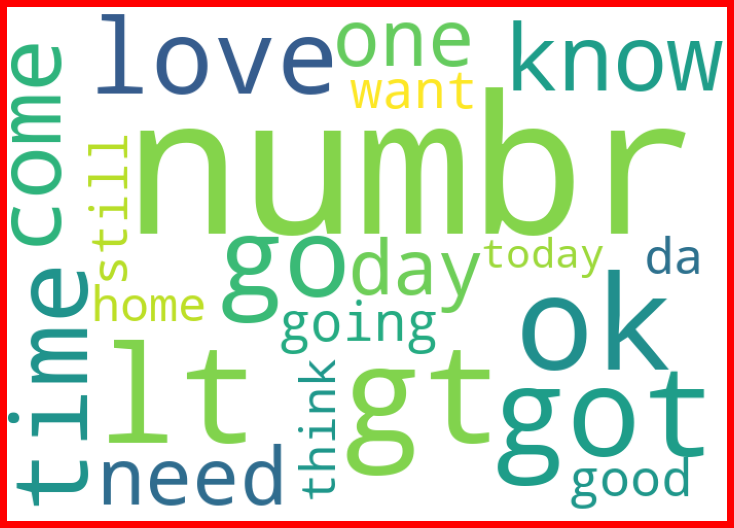

In [50]:
# Getting sense of Loud words in ham

from wordcloud import WordCloud

hams=sms['messages'][sms['label']==0]

ham_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(hams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(ham_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

we can see these are the normal message text.

In [53]:
# 1. convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

tf_vec=TfidfVectorizer()

naive=MultinomialNB()

features=tf_vec.fit_transform(sms['messages'])

x=features
y=sms['label']

In [55]:
# train and predict
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

naive.fit(x_train,y_train)

pred_y=naive.predict(x_test)

print('Final score',accuracy_score(y_test,pred_y))

Final score 0.9698492462311558


In [56]:
print("classification report",classification_report(y_test,pred_y))

classification report               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1202
           1       1.00      0.78      0.88       191

    accuracy                           0.97      1393
   macro avg       0.98      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393



In [58]:
# print confusion matrix 
print('confusion matrix',confusion_matrix(y_test,pred_y))


confusion matrix [[1202    0]
 [  42  149]]


In [59]:
# cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(naive,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.972899662670778
